# IBM Coursera Capstone Project

**Introduction:** In 2017, motor vehicle accidents would have taken 13th place in the CDC's report on the number of deaths and leading causes of death. However, it was not officially listed because motor vehicle accident-related deaths are two-fold: 1) deaths at the scene of the accident, and 2) deaths elsewhere that resulted from injuries caused by motor vehicle accidents. According to the U.S. Department of Transportation, National Highway Traffic Safety Administration, there were 6,734,000 motor vehicle crashes in 2018.

While not all crashes result in death, the volume of crashes and deaths beg an interesting question about the factors at play during a crash. Indeed, in the prompt for this final project, the video asks: what if based on weather and road conditions, we could determine whether it is safe to drive or if we should stay home? This is the question the model below will aim to answer.

**Data:** Our dataset contains approximately 20,000 attributes and has been recommended by the IBM Data Science Certification program on Coursera (therefore, it can be presumed reliable). Upon an initial review, all relevant variables are categorical variables. The dependent variable we are examining is the SEVERITYCODE (how severe the crash was). The independent variables include:
- WEATHER: weather conditions
- ROADCOND: road conditions
- LIGHTCOND: light conditions
- ADDRTYPE: the location type of crash
- UNDERINFL: whether driver was intoxicated

**Methodology:** After building a new data frame with only the relevant variables, we will drop the N/A values. Next, because we are building a model that will help a person determine whether they should stay at home, we will select the decision tree as our machine learning algorithm. Then, because we will be using the Sklearn Decision Tree, we will convert the categorical variables we have into dummy variables. Finally, we split the data into training and testing data before proceeding to build the decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data importing and initial preprocessing

In [2]:
data = pd.read_csv (r'C:\Users\Moira\Documents\IBM Data Science Capstone Data.csv')

C:\Users\Moira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df = data[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'UNDERINFL']].copy()
df.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
ADDRTYPE        object
UNDERINFL       object
dtype: object

In [6]:
df.dropna()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,UNDERINFL
0,2,Overcast,Wet,Daylight,Intersection,N
1,1,Raining,Wet,Dark - Street Lights On,Block,0
2,1,Overcast,Dry,Daylight,Block,0
3,1,Clear,Dry,Daylight,Block,N
4,2,Raining,Wet,Daylight,Intersection,0
...,...,...,...,...,...,...
194668,2,Clear,Dry,Daylight,Block,N
194669,1,Raining,Wet,Daylight,Block,N
194670,2,Clear,Dry,Daylight,Intersection,N
194671,2,Clear,Dry,Dusk,Intersection,N


In [7]:
#Making variable categories uniform
df['UNDERINFL'] = df['UNDERINFL'].replace(['Y'],'1')
df['UNDERINFL'] = df['UNDERINFL'].replace(['N'],'0')

#### Data preprocessing towards decision-tree-building

In [8]:
df_dt = pd.get_dummies(df, columns=['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'UNDERINFL'],
               dtype=None)
df_dt

,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,UNDERINFL_0,UNDERINFL_1
0,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
194669,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
194670,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
194671,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [9]:
df_dt.dtypes

SEVERITYCODE                          int64
WEATHER_Blowing Sand/Dirt             uint8
WEATHER_Clear                         uint8
WEATHER_Fog/Smog/Smoke                uint8
WEATHER_Other                         uint8
WEATHER_Overcast                      uint8
WEATHER_Partly Cloudy                 uint8
WEATHER_Raining                       uint8
WEATHER_Severe Crosswind              uint8
WEATHER_Sleet/Hail/Freezing Rain      uint8
WEATHER_Snowing                       uint8
WEATHER_Unknown                       uint8
ROADCOND_Dry                          uint8
ROADCOND_Ice                          uint8
ROADCOND_Oil                          uint8
ROADCOND_Other                        uint8
ROADCOND_Sand/Mud/Dirt                uint8
ROADCOND_Snow/Slush                   uint8
ROADCOND_Standing Water               uint8
ROADCOND_Unknown                      uint8
ROADCOND_Wet                          uint8
LIGHTCOND_Dark - No Street Lights     uint8
LIGHTCOND_Dark - Street Lights O

#### Build Decision Tree

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [15]:
#Identify the X and Y
X = df_dt.drop('SEVERITYCODE', axis=1)
Y = df_dt['SEVERITYCODE']

In [16]:
#Split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=14)

To optimize the accuracy of the decision tree, we need to identify what depth will yield the highest accuracy. To do this, I am using code from Michael Kana: [Towards Data Science: "How To Find Decision Tree Depth via Cross-Validation"](https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6).

In [17]:
#function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, Y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, Y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, Y).score(X, Y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

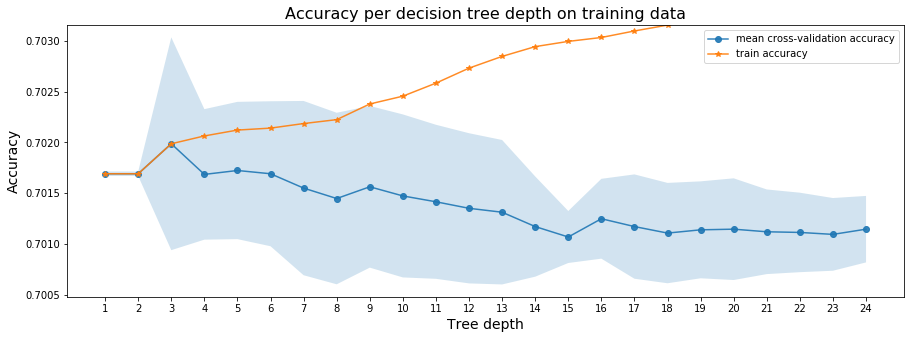

In [19]:
#function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, Y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

Based on the graph, the mean cross-validation accuracy is maximized at depth = 3.

In [35]:
#Build decision tree
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
pred_DT = DT.predict(X_test)

#### Decision Tree Visualization

In [34]:
!conda install -c conda-forge pydotplus -y

Solving environment: ...working... done

# All requested packages already installed.



In [1]:
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.



In [42]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\Moira\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [53]:
#create class_names (list of str)
temp = np.unique(Y_train)
classNames = []
for name in temp:
    classNames.append(str(name))
print(classNames)
#prepare other parameters
dot_data = StringIO()
filename = "Crash_Tree.png"
featureNames = df_dt.columns[0:34]
targetNames = df_dt["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames, 
                         out_file=dot_data, class_names=classNames, 
                         filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int64") to str

#### Evaluate Decision Tree

In [38]:
from sklearn import metrics

In [39]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, pred_DT))

DecisionTrees's Accuracy:  0.6986515988185438
